In [1]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
import gym
from lunar_lander import LunarLander2QModel
from maslourl.trackers.file_logger import FileLogger

In [2]:
replay_buffer_size = 1000000
training_batch_size = 64
max_episodes = 5000
max_steps = 3000
target_network_replace_frequency_steps = 100
model_backup_frequency_episodes = 25
starting_epsilon = 1
minimum_epsilon = 0.01
epsilon_decay = 0.996
discount_factor = 0.99

In [3]:
env = gym.make('LunarLander-v2')

In [4]:
agent = LunarLander2QModel(env, replay_buffer_size=replay_buffer_size)

In [5]:
agent.summary()

Observation space: Box([-inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf], (8,), float32)
Action space: Discrete(4)
Model: "LunarLander"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 69,124
Trainable params: 69,124
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
agent.train(episodes=max_episodes, max_steps_for_episode=max_steps, starting_epsilon=starting_epsilon, epsilon_min=minimum_epsilon,
            epsilon_decay=epsilon_decay, target_network_replace_frequency_steps=target_network_replace_frequency_steps,
            training_batch_size=training_batch_size,
            discount_factor=discount_factor, model_backup_frequency_episodes= model_backup_frequency_episodes,path_to_back_up="./back_ups_phil/",
            episodes_for_average_tracking=50, file_logger=FileLogger("./logging/log_phil.csv"))

episode 0 finished in 61 steps with reward -101.70. Average reward over last 50: -101.70 And took: 3.51 seconds. 
episode 1 finished in 105 steps with reward -137.13. Average reward over last 50: -119.41 And took: 26.00 seconds. 
episode 2 finished in 184 steps with reward -332.96. Average reward over last 50: -190.59 And took: 43.96 seconds. 
episode 3 finished in 245 steps with reward -164.81. Average reward over last 50: -184.15 And took: 59.50 seconds. 
episode 4 finished in 338 steps with reward 137.00. Average reward over last 50: -119.92 And took: 80.35 seconds. 
episode 5 finished in 660 steps with reward -421.51. Average reward over last 50: -170.18 And took: 164.83 seconds. 
episode 6 finished in 171 steps with reward -247.96. Average reward over last 50: -181.30 And took: 44.90 seconds. 


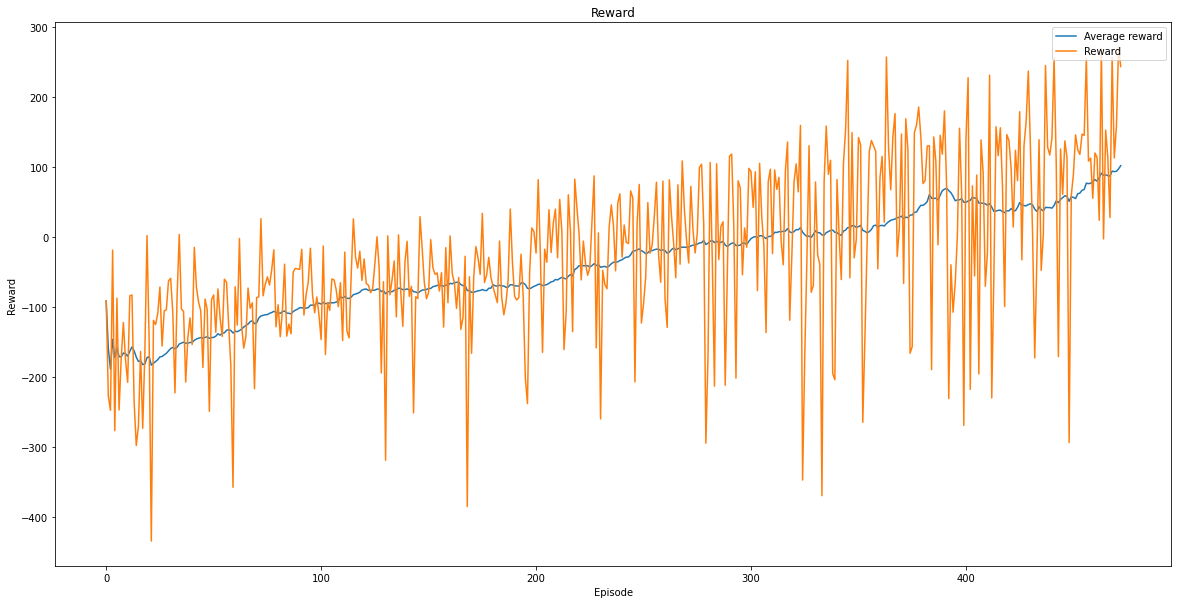

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("./logging/log_temp.csv", sep=';')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax2.plot(data['epsilon'])
ax2.legend(['Epsilon'], loc='upper left')
ax2.ylabel("Epsilon")

ax1.plot(data['average'])
ax1.plot(data['reward'])
ax1.xlabel('Episode')
ax1.legend(['Average reward', 'Reward'], loc='upper right')
ax1.ylabel('Reward')

plt.title('Reward')
plt.show()

In [9]:
agent.test(1,1000, visualize=True)

Starting episode 0



KeyboardInterrupt



In [23]:
agent = LunarLander2QModel(env, None, 1000)
agent.load_model("back_ups_big/model_500.h5")